In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import tensorflow as tf
import sklearn as skl
import datetime 

C:\Users\sebac\anaconda3\envs\pythondate\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\sebac\anaconda3\envs\pythondate\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\sebac\anaconda3\envs\pythondate\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\sebac\anaconda3\envs\pythondate\lib\site-packages

In [2]:
trump3_df = pd.read_csv("trump_3_2020.csv")
trump3_df.head(5)

C:\Users\sebac\anaconda3\envs\pythondate\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (9,22) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1.319790e+18,1.319760e+18,2020-10-23 19:59:59 Eastern Daylight Time,10/23/2020,19:59:59,-400,7.814545e+08,redmazuratii,redmazuratii,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': '781454486', 'username': 'redmazur...",NaN,NaN,NaN,NaN
1,1.319790e+18,1.319760e+18,2020-10-23 19:59:59 Eastern Daylight Time,10/23/2020,19:59:59,-400,2.271092e+09,olikolokolo,Eileen Kasai,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': '61734492', 'username': 'Fahrentho...",NaN,NaN,NaN,NaN
2,1.319790e+18,1.319730e+18,2020-10-23 19:59:59 Eastern Daylight Time,10/23/2020,19:59:59,-400,3.856092e+08,patkerr97,Patrick Kerr,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': '25073877', 'username': 'realDonal...",NaN,NaN,NaN,NaN
3,1.319790e+18,1.319770e+18,2020-10-23 19:59:59 Eastern Daylight Time,10/23/2020,19:59:59,-400,1.097230e+08,comeandtakeit19,⚠️ℕ𝕠𝕣𝕥𝕙𝕖𝕣𝕟 𝕡𝕒𝕥𝕣𝕚𝕠𝕥⚠️,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': '165743715', 'username': 'taylor4a...",NaN,NaN,NaN,NaN
4,1.319790e+18,1.319790e+18,2020-10-23 19:59:59 Eastern Daylight Time,10/23/2020,19:59:59,-400,1.492634e+07,wardcapceo,Marc Ward,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': '25073877', 'username': 'realDonal...",NaN,NaN,NaN,NaN


In [3]:
#columns to drop 
columns = ['place', 'retweet', 'quote_url','near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 'retweet_date', 'translate', 'trans_src', 'trans_dest']
trump3_df.drop(columns, axis = 1, inplace = True)
trump3_df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,tweet,...,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,video,thumbnail,reply_to
0,1.319790e+18,1.319760e+18,2020-10-23 19:59:59 Eastern Daylight Time,10/23/2020,19:59:59,-400,7.814545e+08,redmazuratii,redmazuratii,@ReesusP @realDonaldTrump https://t.co/c2QayQ4tpd,...,['https://pbs.twimg.com/media/ElDWpzdW0AMV907....,0,0,0,[],[],https://twitter.com/redmazuratii/status/131979...,1,https://pbs.twimg.com/media/ElDWpzdW0AMV907.jpg,"{'user_id': '781454486', 'username': 'redmazur..."
1,1.319790e+18,1.319760e+18,2020-10-23 19:59:59 Eastern Daylight Time,10/23/2020,19:59:59,-400,2.271092e+09,olikolokolo,Eileen Kasai,@Fahrenthold @realDonaldTrump Charitable only ...,...,['https://pbs.twimg.com/tweet_video_thumb/ElDW...,0,0,0,[],[],https://twitter.com/olikolokolo/status/1319790...,1,https://pbs.twimg.com/tweet_video_thumb/ElDWpq...,"{'user_id': '61734492', 'username': 'Fahrentho..."
2,1.319790e+18,1.319730e+18,2020-10-23 19:59:59 Eastern Daylight Time,10/23/2020,19:59:59,-400,3.856092e+08,patkerr97,Patrick Kerr,@realDonaldTrump https://t.co/BttwTReXaV,...,['https://pbs.twimg.com/media/ElDWpt4XgAAsUA2....,0,0,0,[],[],https://twitter.com/Patkerr97/status/131979070...,1,https://pbs.twimg.com/media/ElDWpt4XgAAsUA2.jpg,"{'user_id': '25073877', 'username': 'realDonal..."
3,1.319790e+18,1.319770e+18,2020-10-23 19:59:59 Eastern Daylight Time,10/23/2020,19:59:59,-400,1.097230e+08,comeandtakeit19,⚠️ℕ𝕠𝕣𝕥𝕙𝕖𝕣𝕟 𝕡𝕒𝕥𝕣𝕚𝕠𝕥⚠️,@taylor4arizona @JoeBiden @realDonaldTrump Tru...,...,[],0,0,1,[],[],https://twitter.com/Comeandtakeit19/status/131...,0,NaN,"{'user_id': '165743715', 'username': 'taylor4a..."
4,1.319790e+18,1.319790e+18,2020-10-23 19:59:59 Eastern Daylight Time,10/23/2020,19:59:59,-400,1.492634e+07,wardcapceo,Marc Ward,@realDonaldTrump you do realize that “least ra...,...,[],0,0,0,[],[],https://twitter.com/wardcapceo/status/13197907...,0,NaN,"{'user_id': '25073877', 'username': 'realDonal..."


In [4]:
tweet_time = trump3_df.time.value_counts()
tweet_time

0:50:41     35
0:19:31     34
0:30:00     34
0:15:25     33
0:17:23     33
            ..
7:32:56      1
2:47:55      1
5:00:24      1
19:08:06     1
6:32:03      1
Name: time, Length: 71616, dtype: int64

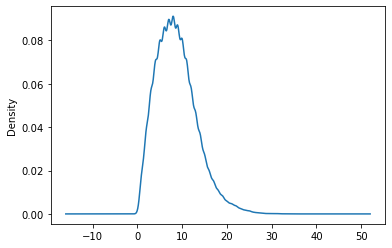

In [5]:
# Visualize the value counts
tweet_time.plot.density()

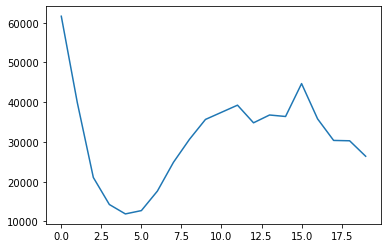

In [6]:
#Tweets per Hour
trump3_df["hour"]=pd.to_datetime(trump3_df['time'], format='%H:%M:%S').dt.hour
hours=trump3_df.hour.value_counts()
hours.sort_index(ascending=True, inplace=True)
hours.plot()

In [7]:
def cleaned_tweet (row):
    clean_tweet=row["tweet"]
    s = []
    for word in clean_tweet.split():
        if '@' not in word and 'https' not in word and '#' not in word:
            s.append(word)
    return (' ').join(s)

In [8]:
def label_na (row):
    if len(row['cleaned_tweet'].strip())==0: 
        return np.NaN
    else:
        return row["cleaned_tweet"]

In [9]:
trump3_df["cleaned_tweet"]=trump3_df.apply (lambda row: cleaned_tweet(row), axis=1)

In [10]:
trump3_df.to_csv('super_clean_trump3_df.csv', index = False)